# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Classification Analysis with XGBoost</b></p>
![](https://img.freepik.com/free-vector/dollars-illustration-set_74855-4404.jpg?t=st=1657689230~exp=1657689830~hmac=87d1560ac28551580c64ab1b442f2e2cc0e27bfd7fbf3380d86ba23c11fd9de8&w=1060)

<b> Hi guys, welcome to </b>[Tirendaz Academy](https://youtube.com/c/tirendazacademy)😀

In this notebook, I'm going to talk about classification with XGBoost.

<b>Table of contents:</b>
<ul>
<li><a href="#xgboost">What is XGBoost?</a></li>
<li><a href="#load">Loading the dataset</a></li>  
<li><a href="#understanding">Understanding the dataset</a></li>
<li><a href="#preprocessing">Data preprocessing</a></li>
<li><a href="#xgboost_model">The XGBoost model</a></li>
<li><a href="#regression">Logistic Regression vs XGBoost</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

Happy learning 🐱‍🏍 

<a id='#xgboost'></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>What is XGBoost?</b></p>

[XGBoost](https://xgboost.readthedocs.io/en/stable/) is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. XGBoost is short for Extreme Gradient Boosting. You can use the XGBoost to implement gradient boosting. It provides a parallel tree boosting that solves many data science problems in a fast and accurate way. 

<a id='load'></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Loading The Dataset</b></p>
The dataset named Adult Census Income is present in Kaggle and [UCI repository](https://archive.ics.uci.edu/ml/datasets/adult). This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to specify whether a person makes over \$50K a year or not. 

Let's load this dataset with the `read_csv` method in Pandas

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
from sklearn.utils.multiclass import type_of_target
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<a id='understanding'></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Understanding The Dataset</b></p>
The understanding stage is where we attempt to explore the data. Let's take a look at the type of columns with the `dtypes` attribute.

In [2]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

The dataset contained both numerical and categorical values. Let me look at missing data with the `isnull` method.

In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Cool. There is no missing data in the dataset. I'll look at the general information in the dataset with the `info` method.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As you can see, there are 32561 rows and 15 columns in the dataset.

<a id='preprocessing'></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Data Preprocessing</b></p>

Here the education_num column is a numerical conversion of 'education'. As the information is the same, we can delete the education column.

In [5]:
df = df.drop(["education"], axis=1)

Let's convert non-numerical columns into numerical columns with the `get_dummies` method in Pandas.

In [6]:
df = pd.get_dummies(df)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,90,77053,9,0,4356,40,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,66,186061,10,0,4356,40,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


As you can see, the categorical values were converted into numerical values. 1 indicates presence and 0 indicates absence. Let's take a look at the columns of dataset with the `columns` attribute.

In [7]:
df.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occup

To specify the target variable, let's delete the income < 50K column with the `drop` method.

In [8]:
df = df.drop("income_<=50K", axis = 1)

Let's create the target and feature variables with the `iloc` method.

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Let's split the dataset into the training, validation, and test set with the `train_test_split` method.

In [10]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X,y,random_state=0)

To evaluate the model, let me create the validation set with the `train_test_split` method.

In [11]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full, y_train_full, random_state=0)

<a id='xgboost_model'></a>
# <p style="background-color:#28C0F2;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>The XGBoost Model</b></p>
XGBoost provides a parallel tree boosting that solve many data science problems in a fast and accurate way. Let's build an XGBoost classifier model with a n_estimators value of 500, the learning rate value of 0.05 and the early_stopping_rounds value of 5. Keep in mind that a small learning rate and a larger number of estimators will yield more accurate XGBoost models.

In [12]:
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.05,
                        use_label_encoder = False,
                        eval_metric = "logloss",
                        early_stopping_rounds = 5,
                        n_jobs = -1)

Let me train the model with the `fit` model.

In [13]:
xgb_clf.fit(X_train, y_train,eval_set = [(X_val,y_val)],verbose = False)                  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

Let's take a look at the performance of the model with the accuracy metric.I'm going to look at the model accucary on the train set and test set.

---------------------------------------------------------
Train score Accuracy:0.9433356792231106
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     18527
           1       0.82      0.67      0.74      5893

    accuracy                           0.88     24420
   macro avg       0.86      0.81      0.83     24420
weighted avg       0.88      0.88      0.88     24420

---------------------------------------------------------


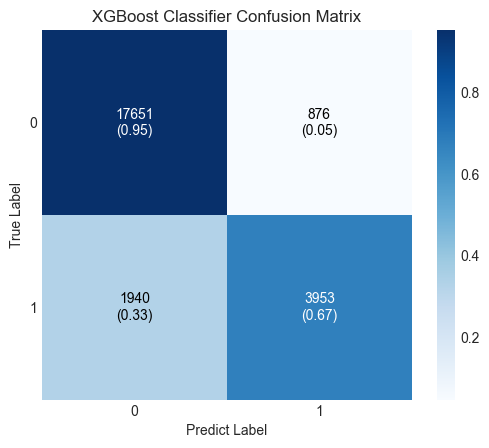

In [14]:
print('---------------------------------------------------------')
print('Train score Accuracy:'+str(roc_auc_score(y_train_full,xgb_clf.predict_proba(X_train_full)[:, 1])))
print('---------------------------------------------------------')
print(classification_report(y_train_full,xgb_clf.predict(X_train_full)))
print('---------------------------------------------------------')
y_pred=xgb_clf.predict(X_train_full)
conf=confusion_matrix(y_train_full, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf,colorbar=True,show_normed=True)
plt.title("XGBoost Classifier Confusion Matrix")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show()  

---------------------------------------------------------
Test score Accuracy:0.9226062843025726
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6193
           1       0.78      0.62      0.69      1948

    accuracy                           0.87      8141
   macro avg       0.83      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141

---------------------------------------------------------


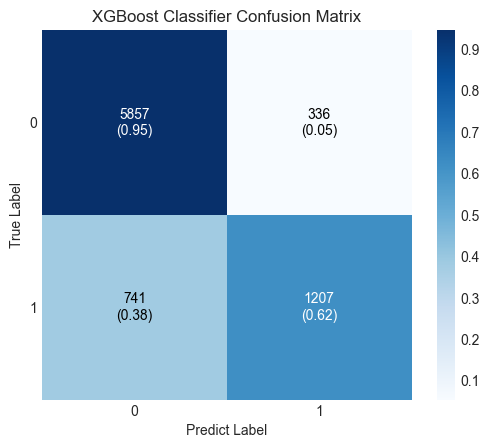

In [15]:
print('---------------------------------------------------------')
print('Test score Accuracy:'+str(roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:, 1])))
print('---------------------------------------------------------')
print(classification_report(y_test,xgb_clf.predict(X_test)))
print('---------------------------------------------------------')
y_pred=xgb_clf.predict(X_test)
conf=confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf,colorbar=True,show_normed=True)
plt.title("XGBoost Classifier Confusion Matrix")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show()  

<a id='regression'></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression vs XGBoost</b></p>

Logistic regression is one of the most used classification algorithms. Let's compare the XGBoost model with the logistic regression model. To build a logistic regression model, I'm going to use the scikit learn library.

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)               

LogisticRegression(max_iter=1000)

---------------------------------------------------------
Train score Accuracy:0.5804584429230106
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     18527
           1       0.71      0.27      0.39      5893

    accuracy                           0.80     24420
   macro avg       0.76      0.62      0.63     24420
weighted avg       0.78      0.80      0.76     24420

---------------------------------------------------------


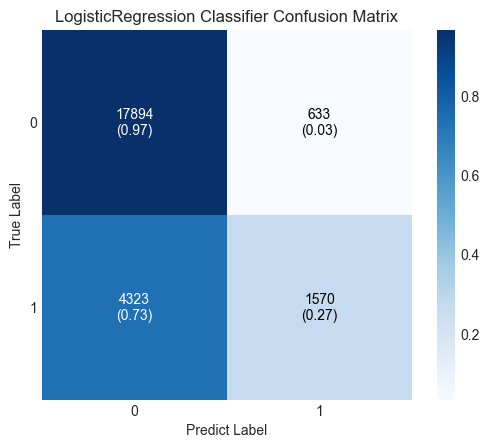

In [17]:
print('---------------------------------------------------------')
print('Train score Accuracy:'+str(roc_auc_score(y_train_full,lr.predict_proba(X_train_full)[:, 1])))
print('---------------------------------------------------------')
print(classification_report(y_train_full,lr.predict(X_train_full)))
print('---------------------------------------------------------')
y_pred=lr.predict(X_train_full)
conf=confusion_matrix(y_train_full, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf,colorbar=True,show_normed=True)
plt.title("LogisticRegression Classifier Confusion Matrix")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show()  

---------------------------------------------------------
Test score Accuracy:0.5686883681018942
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      6193
           1       0.72      0.27      0.39      1948

    accuracy                           0.80      8141
   macro avg       0.76      0.62      0.63      8141
weighted avg       0.79      0.80      0.76      8141

---------------------------------------------------------


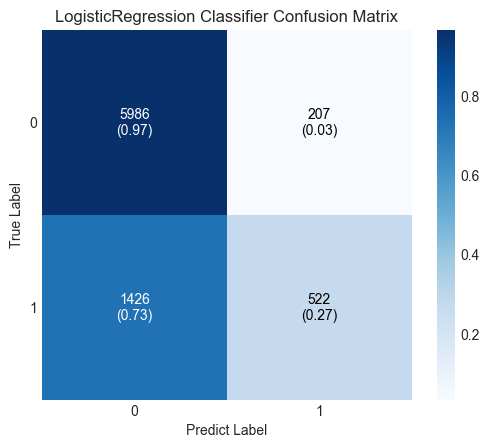

In [18]:
print('---------------------------------------------------------')
print('Test score Accuracy:'+str(roc_auc_score(y_test,lr.predict_proba(X_test)[:, 1])))
print('---------------------------------------------------------')
print(classification_report(y_test,lr.predict(X_test)))
print('---------------------------------------------------------')
y_pred=lr.predict(X_test)
conf=confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf,colorbar=True,show_normed=True)
plt.title("LogisticRegression Classifier Confusion Matrix")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show()  

<a id='conclusion'></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Conclusion</b></p>

XGBoost is used implement gradient boosting. It's an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. As a result, it turned out that the performance of the XGBoost model is better than the performance of the logistic regression model for the adult census income dataset.